In [18]:
import sys
sys.path.append('/Users/jakehirst/Desktop/sfx/sfx_ML_code/sfx_ML/New_Models')

from RF_fed_GPR import *
from NN_fed_GPR import *
from GPR import *
from Single_UQ_models import *

all_labels = ['height', 'phi', 'theta', 
                            'impact site x', 'impact site y', 'impact site z', 
                            'impact site r', 'impact site phi', 'impact site theta']

model_types = ['Single GPR', 'NN_fed_GPR', 'RF_fed_GPR']

labels_to_predict = ['impact site x', 'impact site y', 'height']
# labels_to_predict = ['height']

with_or_without_transformations = 'with'
with_or_without_transformations = 'without'

Paper2_path = f'/Volumes/Jake_ssd/Paper 2/{with_or_without_transformations}_transformations_trial_2'
Paper2_path = f'/Volumes/Jake_ssd/Paper 2/{with_or_without_transformations}_transformations_trial_2'

model_folder = Paper2_path + f'/UQ_bagging_models_{with_or_without_transformations}_transformations'
data_folder = Paper2_path + '/5fold_datasets'
results_folder = Paper2_path + '/Compare_Code_5_fold_ensemble_results'
hyperparam_folder = Paper2_path + f'/bayesian_optimization_{with_or_without_transformations}_transformations'

image_folder = '/Users/jakehirst/Desktop/sfx/sfx_ML_data/images_sfx/new_dataset/Visible_cracks'

if(with_or_without_transformations == 'with'):
    full_dataset_pathname = "/Volumes/Jake_ssd/Paper 1/Paper_1_results_WITH_feature_engineering/dataset/feature_transformations_2023-11-16/height/HEIGHTALL_TRANSFORMED_FEATURES.csv"
    backward_feat_selection_results_folder = '/Volumes/Jake_ssd/Paper 1/Paper_1_results_WITH_feature_engineering/results'
else:
    # full_dataset_pathname = "/Volumes/Jake_ssd/Paper 1/Paper_1_results_no_feature_engineering/dataset/New_Crack_Len_FULL_OG_dataframe_2023_11_16.csv"
    full_dataset_pathname = "/Volumes/Jake_ssd/Paper 2/New_Crack_Len_FULL_OG_dataframe_2024_02_22.csv"
    backward_feat_selection_results_folder = Paper2_path + '/Paper_2_results_WITHOUT_feature_engineering/results' 
    df = pd.read_csv(full_dataset_pathname, index_col=0)
    all_features = df.columns
    all_features = all_features.drop(all_labels)
    all_features = str(all_features.drop('timestep_init').to_list())

    print(all_features)

['init z', 'init y', 'init x', 'max_prop_speed', 'avg_prop_speed', 'dist btw frts', 'crack len', 'linearity', 'max thickness', 'mean thickness', 'median_thickness', 'var_thickness', 'std_thickness', 'thickness_at_init', 'max_kink', 'abs_val_mean_kink', 'mean_kink', 'sum_kink', 'abs_val_sum_kink', 'median_kink', 'std_kink', 'var_kink', 'avg_ori', 'angle_btw']


# Aleatoric and Epistemic uncertainties can be easily calculated with the GPR uncertainties:



impact site x
Single GPR



/Users/jakehirst/miniconda3/envs/tfp_env/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


24.9**2 * RBF(length_scale=65.9) + WhiteKernel(noise_level=82.5)


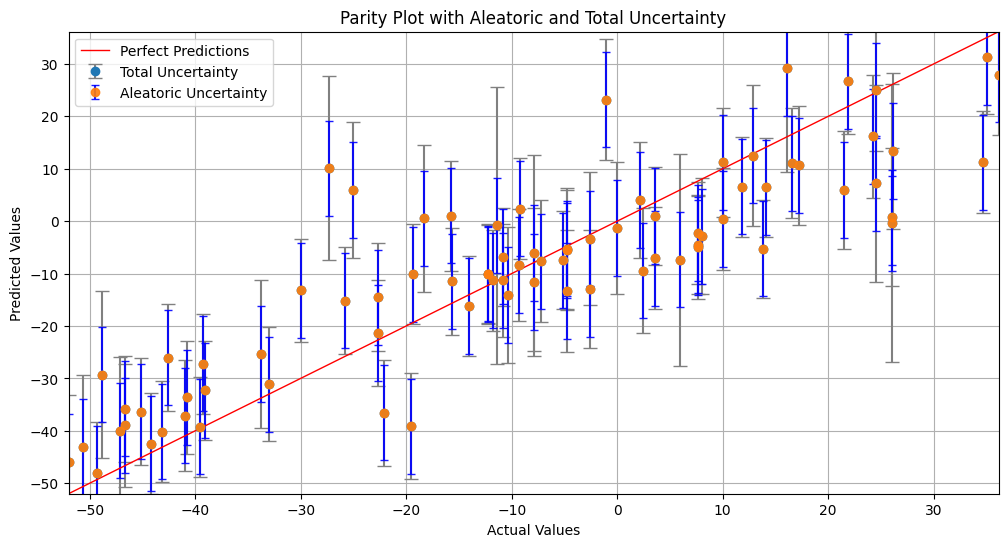

NN_fed_GPR

18**2 * Matern(length_scale=4.13, nu=1.5) + WhiteKernel(noise_level=10)


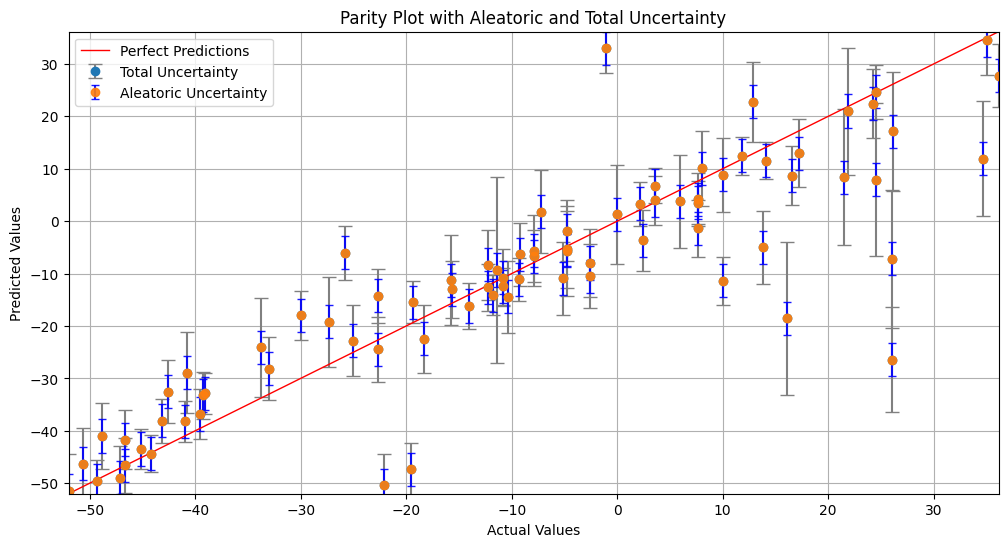

RF_fed_GPR

10**2 * Matern(length_scale=1e+03, nu=1.5) + WhiteKernel(noise_level=0.735)


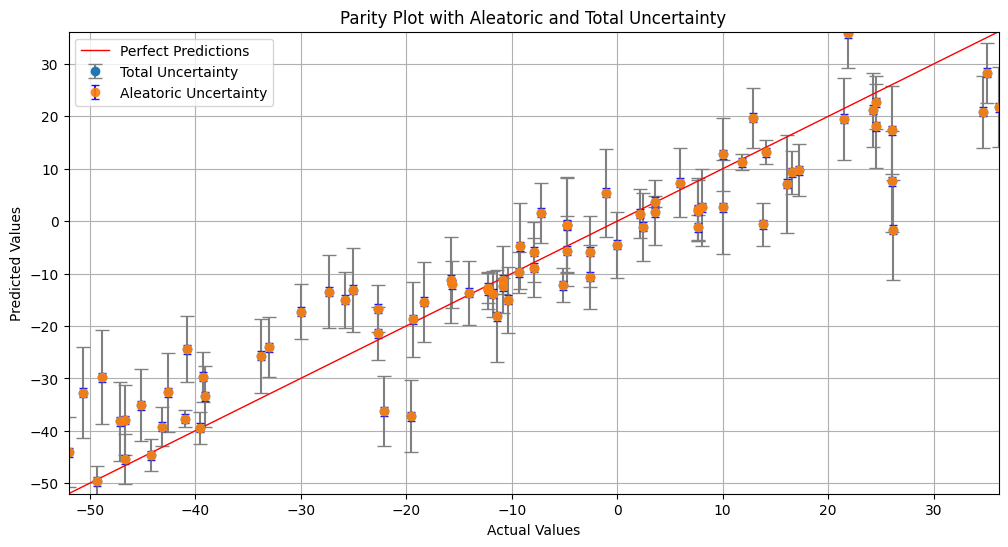



impact site y
Single GPR



/Users/jakehirst/miniconda3/envs/tfp_env/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


117**2 * RBF(length_scale=422) + WhiteKernel(noise_level=155)


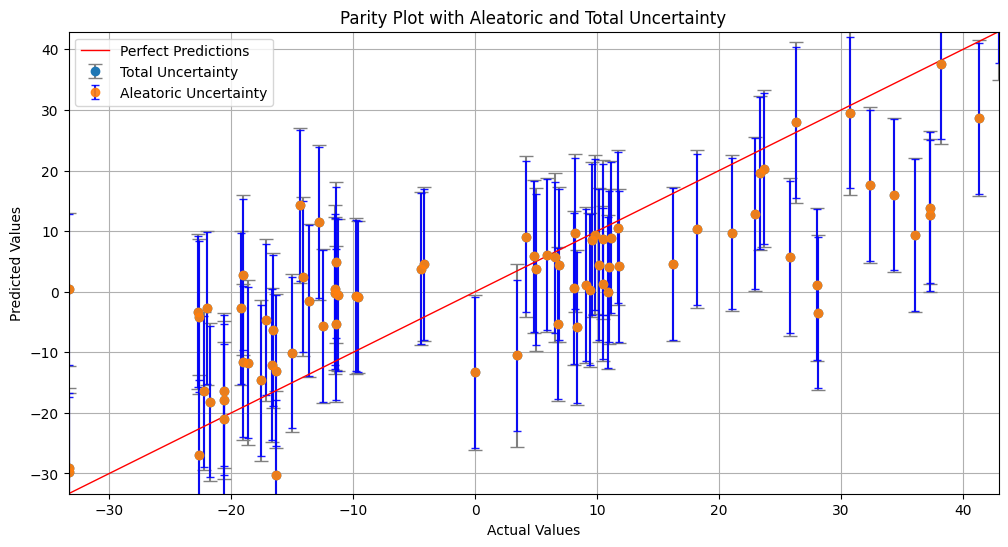

NN_fed_GPR

16.3**2 * Matern(length_scale=1.21, nu=1.5) + WhiteKernel(noise_level=10)


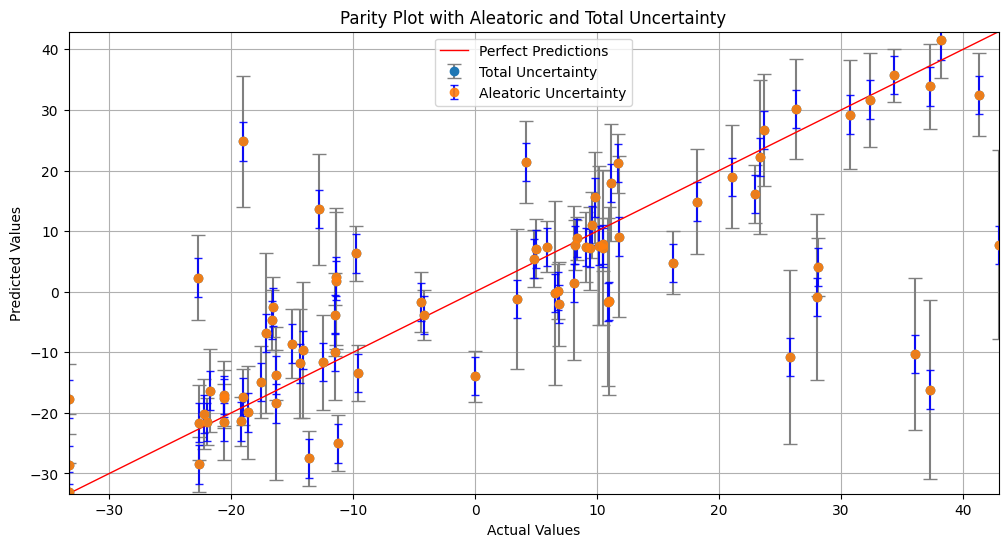

RF_fed_GPR

9.18**2 * Matern(length_scale=1e+03, nu=1.5) + WhiteKernel(noise_level=0.878)


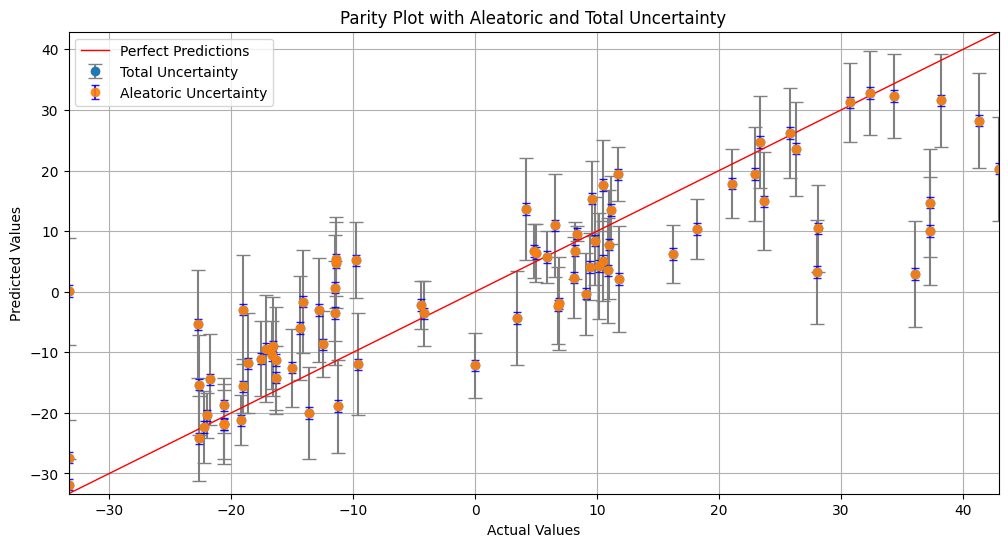



height
Single GPR



/Users/jakehirst/miniconda3/envs/tfp_env/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


2.83**2 * RBF(length_scale=896) + WhiteKernel(noise_level=1.03)


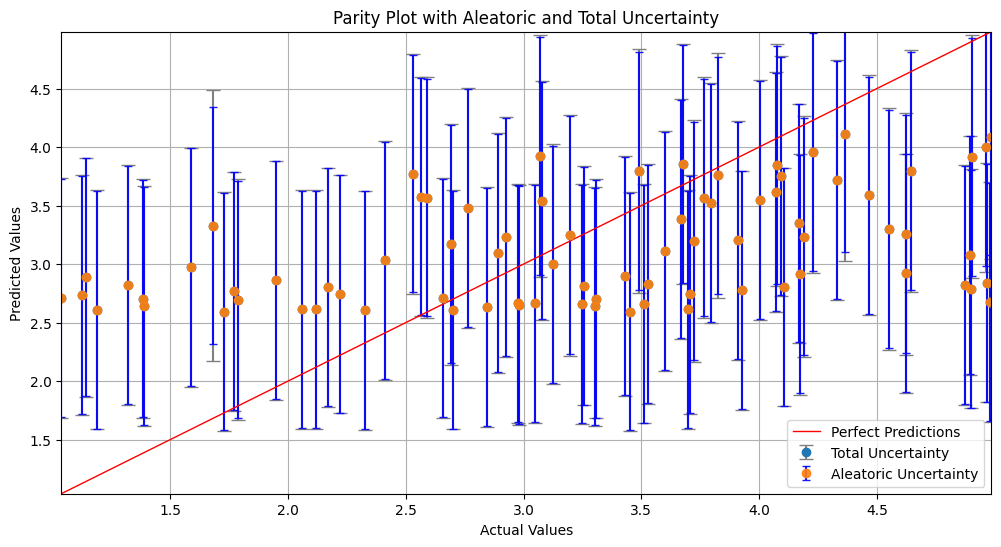

NN_fed_GPR

3.42**2 * Matern(length_scale=4.67, nu=1.5) + WhiteKernel(noise_level=1.01)


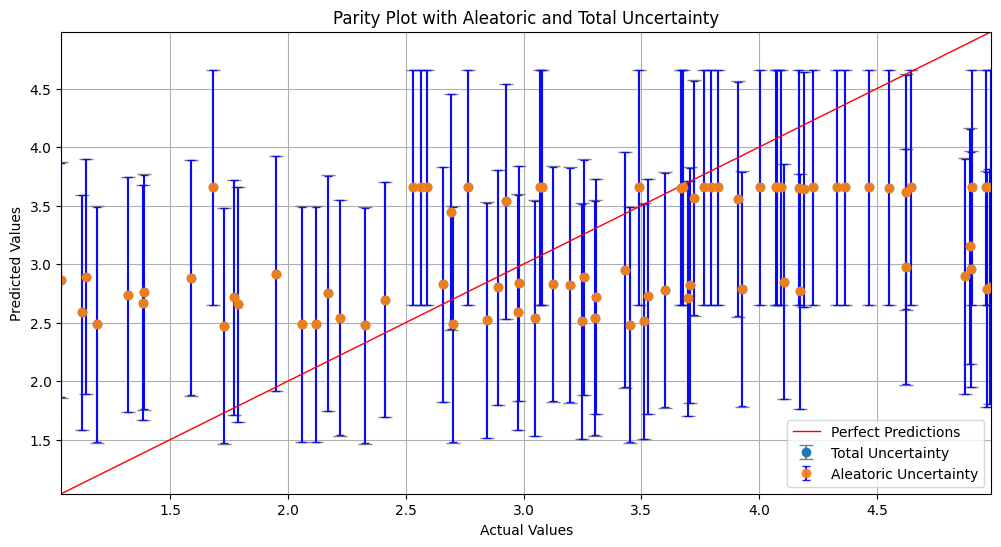

RF_fed_GPR

3.88**2 * Matern(length_scale=1e+03, nu=1.5) + WhiteKernel(noise_level=0.142)


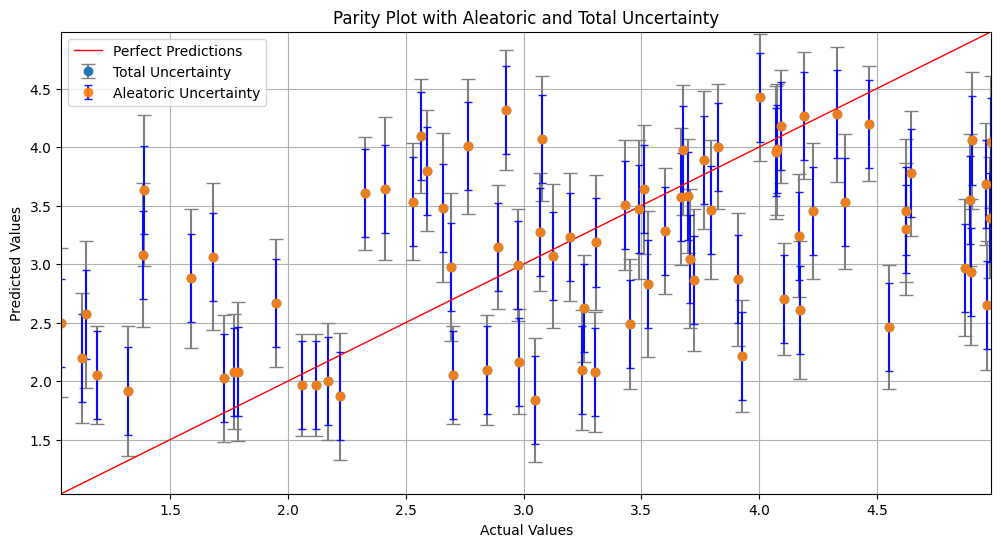

here


In [19]:

for label_to_predict in labels_to_predict:
    print('\n\n' + label_to_predict)
    for model_type in model_types:
        print(model_type + '\n')
        for fold_no in range(2,3):
            model_path = f'/Volumes/Jake_ssd/Paper 2/without_transformations_trial_2/UQ_bagging_models_without_transformations/{label_to_predict}/{model_type}/1_models/fold_{fold_no}'
            model_path = f'/Volumes/Jake_ssd/Paper 2/without_transformations/UQ_bagging_models_without_transformations/{label_to_predict}/{model_type}/1_models/fold_{fold_no}'

            results_saving_folder = f'{results_folder}/{label_to_predict}/{model_type}/1_models/fold_{fold_no}'
            test_features_path = Paper2_path + f'/5fold_datasets/{label_to_predict}/fold{fold_no}/test_features.csv'
            test_labels_path = Paper2_path + f'/5fold_datasets/{label_to_predict}/fold{fold_no}/test_labels.csv'
            test_r2, test_ensemble_predictions, test_ensemble_uncertanties, test_labels = Get_predictions_and_uncertainty_single_model(test_features_path, test_labels_path, model_path, results_saving_folder, ast.literal_eval(all_features), label_to_predict, model_type)

        
            model = load_GPR_model(model_path + '/model_no1.sav')
            #The aleatoric uncerrtainty is ASSUMED to be constant across all inputs with the way that the GPR is set up, and can be represented as the sqrt of the noise level of the white noise kernel.
            #We take the sqrt because the noise_level is represented as a variance. So if you want to get the standard deviation, you need to square root it.
            if(model_type == 'Single GPR'):
                # print(model.get_params()['kernel']) 
                print(model.kernel_)
                white_noise = model.kernel_.k2.noise_level
            else:
                homoscedastic_aleatoric_uncertainty = np.sqrt(model.gpr.get_params()['kernel__k2__noise_level'])
                # print(model.gpr.get_params()['kernel'])
                print(model.gpr.kernel_) #COMMENT model.kernel is the initiated kernel, whereas model.kernel_ is the optimized kernel!! this took so long to figure out...
                white_noise = model.gpr.kernel_.k2.noise_level
                
                

            #Aleatoric uncertainty (constant, from WhiteKernel)
            aleatoric_uncertainty = np.sqrt(white_noise)

            # Total uncertainty is the predictive standard deviation from the GP
            total_uncertainties = test_ensemble_uncertanties / 2 #divide by two 

            # Create the parity plot with error bars for total and aleatoric uncertainty
            plt.figure(figsize=(12, 6))

            # Total uncertainty error bars
            plt.errorbar(test_labels, test_ensemble_predictions, yerr=total_uncertainties, fmt='o', ecolor='gray', alpha=1, capsize=5, label='Total Uncertainty')

            # Aleatoric uncertainty error bars
            plt.errorbar(test_labels, test_ensemble_predictions, yerr=aleatoric_uncertainty, fmt='o', ecolor='blue', alpha=0.9, capsize=3, label='Aleatoric Uncertainty')

            # Plot the line of perfect predictions for reference
            plt.plot([test_labels.min(), test_labels.max()], [test_labels.min(), test_labels.max()], c='r', lw=1, label='Perfect Predictions')

            plt.xlim((test_labels.to_numpy().min(), test_labels.to_numpy().max()))
            plt.ylim((test_labels.to_numpy().min(), test_labels.to_numpy().max()))
            plt.xlabel('Actual Values')
            plt.ylabel('Predicted Values')
            plt.title('Parity Plot with Aleatoric and Total Uncertainty')
            plt.legend()
            plt.grid(True)
            # plt.axis('equal')
            plt.show()

            
# model_path = f'/Volumes/Jake_ssd/Paper 2/without_transformations_trial_2/UQ_bagging_models_without_transformations/impact site x/Single GPR/1_models/fold_1/model_no1.sav'
# model = load_GPR_model(model_path)
# print(model.get_params())
# print(model.get_params()['kernel']) 

# model_path = f'/Volumes/Jake_ssd/Paper 2/without_transformations_trial_2/UQ_bagging_models_without_transformations/impact site y/Single GPR/1_models/fold_1/model_no1.sav'
# model = load_GPR_model(model_path)
# print(model.get_params())
# print(model.get_params()['kernel']) 

# model_path = f'/Volumes/Jake_ssd/Paper 2/without_transformations_trial_2/UQ_bagging_models_without_transformations/height/Single GPR/1_models/fold_1/model_no1.sav'
# model = load_GPR_model(model_path)
# print(model.get_params())
# print(model.get_params()['kernel']) 

# print(model.gpr.get_params()) 
# print(model.gpr.get_params()['kernel'])   
            


print('here')